## **IMPORT LIBRARIES**

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          
import matplotlib.pyplot as plt # visualization
# plt.rcParams.update({'font.size': 14})
import seaborn as sns # visualization
import math 
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
from keras.models import Sequential 
from keras.layers import Activation, Dense , Concatenate,BatchNormalization  

In [8]:
import keras
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU
import tensorflow 
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import argparse
import imutils
import cv2
import os
import numpy as np
from numpy import asarray
from sklearn.preprocessing import StandardScaler

## **READING THE DATA**

In [10]:
# Load preprocessed data "ts_drive"  
test_drive_df= pd.read_csv('/home/ahmed/queens_project/final_project/ts_drive.csv' ) 

In [11]:
test_drive_df

,Rec_Lat,Rec_Long,RSRP,serving_Lat,serving_Long,distance,Bearing_angle,PL
0,30.01471,31.45804,-66.5625,30.010772,31.456667,0.456179,-112.230030,121.949087
1,30.01472,31.45804,-66.5625,30.010772,31.456667,0.457239,-112.179183,121.983458
2,30.01472,31.45805,-66.5625,30.010772,31.456667,0.457520,-112.324916,121.992532
3,30.01472,31.45806,-66.8125,30.010772,31.456667,0.457802,-112.470345,122.001660
4,30.01472,31.45807,-67.3125,30.010772,31.456667,0.458086,-112.615469,122.010843
...,...,...,...,...,...,...,...,...
173803,30.00205,31.46490,-76.8750,30.002019,31.461689,0.357060,-179.528178,118.324080
173804,30.00205,31.46491,-76.8750,30.002019,31.461689,0.358171,-179.529643,118.370088
173805,30.00205,31.46492,-76.6875,30.002019,31.461689,0.359283,-179.531099,118.415953
173806,30.00205,31.46493,-79.3750,30.002019,31.461689,0.360395,-179.532546,118.461676


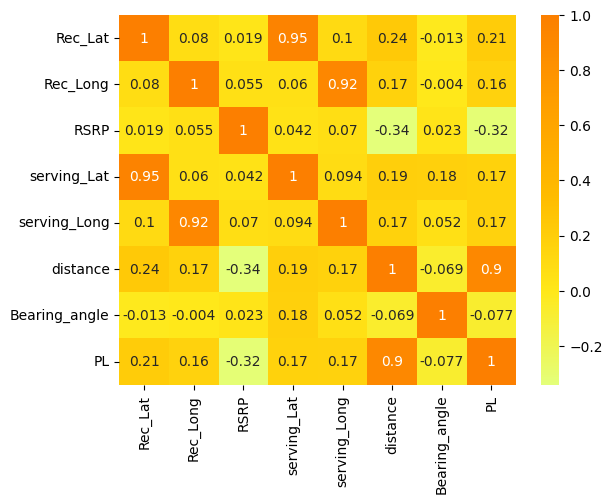

In [12]:
# correlation plot
corr = test_drive_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [13]:
# Check null values 
test_drive_df.isnull().sum()

Rec_Lat          0
Rec_Long         0
RSRP             0
serving_Lat      0
serving_Long     0
distance         0
Bearing_angle    0
PL               0
dtype: int64

## **Split Dataset**

In [14]:
# Determine  data to x train and y train 
y= test_drive_df['RSRP']
x=test_drive_df.drop(columns="RSRP")

In [15]:
# # define standard scaler
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(x)

In [16]:
# Split data to train_X, val_X, train_y, val_y
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [17]:
train_X.shape , val_X.shape , train_y.shape , val_y.shape  # type: ignoree

((130356, 7), (43452, 7), (130356,), (43452,))

# **Numerical Model**

In [19]:
# Define the architecture of Numerical model 
y_size,x_size = test_drive_df.shape 
model = Sequential()
model.add(Dense(x_size,activation='relu')) # x_size - 64 - 64 - 128 - 64 - 64 - x_size
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1)) 


In [20]:
# Compile model 
model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [21]:
# train the model on the data and test it by validation_data 
history = model.fit(
    x= train_X,
    y= train_y,
    batch_size=32,
    epochs=250,
    validation_data=(val_X, val_y))
# I used 250 epochs (if you want you can change the number of epochs or you can edit the callback above)

Epoch 1/250
4074/4074 [==============================] - 17s 4ms/step - loss: 8.0495 - root_mean_squared_error: 10.9686 - val_loss: 7.0808 - val_root_mean_squared_error: 8.7390
Epoch 2/250
4074/4074 [==============================] - 17s 4ms/step - loss: 7.3001 - root_mean_squared_error: 9.0416 - val_loss: 7.1594 - val_root_mean_squared_error: 8.8546
Epoch 3/250
4074/4074 [==============================] - 17s 4ms/step - loss: 7.2186 - root_mean_squared_error: 8.9621 - val_loss: 7.6479 - val_root_mean_squared_error: 9.5605
Epoch 4/250
4074/4074 [==============================] - 17s 4ms/step - loss: 7.1694 - root_mean_squared_error: 8.9180 - val_loss: 7.0626 - val_root_mean_squared_error: 8.7356
Epoch 5/250
4074/4074 [==============================] - 17s 4ms/step - loss: 7.0905 - root_mean_squared_error: 8.8388 - val_loss: 6.8795 - val_root_mean_squared_error: 8.5620
Epoch 6/250
4074/4074 [==============================] - 17s 4ms/step - loss: 7.0433 - root_mean_squared_error: 8.8090 

In [1]:
# this to plot the loss 
# from turtle import color

# plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')

# plt.plot(history.epoch, history.history["val_loss"], 'g', label='Test loss' , color="red")

# plt.plot(history.epoch, history.history["val_root_mean_squared_error"], 'g', label='Test metrics' , color="blue")

# plt.title('Training And Test loss')

# plt.xlabel('Epochs')

# plt.ylabel('Loss')

# plt.legend()

# plt.show()

In [44]:
# Save the model 
model.save("Numerical_Model.h5")